___________________________________________________________________________________________________________________

# Other Useful Algorithms

## String Algorithms

String algorithms are used to manipulate strings. The most common string algorithms
are:
1. Finding the length of a string: This algorithm counts the number of characters
in the string.
2. Reversing a string: This algorithm reverses the order of the characters in the
string.
3. Searching for a substring: This algorithm finds the first occurrence of a
substring in a string.
4. Splitting a string: This algorithm splits a string into a list of substrings.
5. Concatenating strings: This algorithm joins two strings together.

___________________________________________________________________________________________________________________

## Brute Force Pattern matching

The brute force algorithm is also called the naive approach to pattern matching
algorithms. Naive approach means that it is a very basic and simple algorithm. In this
approach, we match all the possible combinations of the input pattern in the given
text string to find the position of the occurrence of the pattern. This algorithm is very
naive and is not suitable if the text is very long

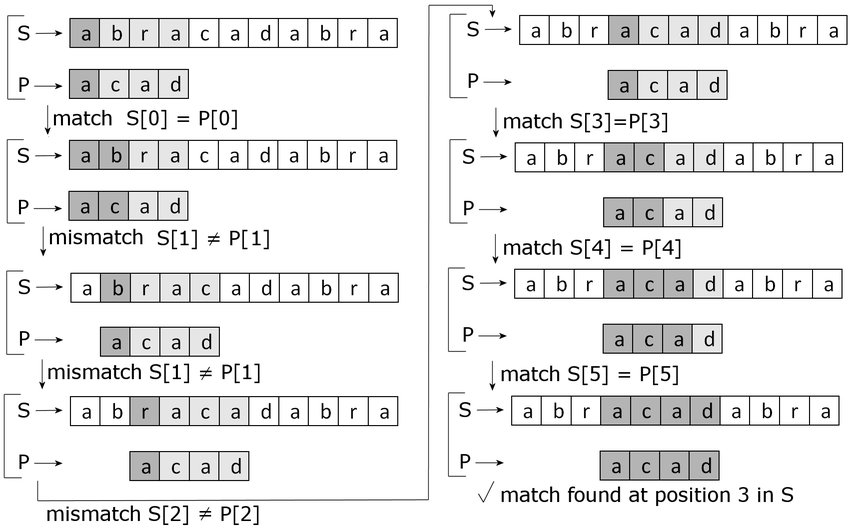

In [1]:
def brute_force(text, pattern):
    l1 = len(text) # The length of the text string
    l2 = len(pattern) # The length of the pattern
    i = 0
    j = 0 # looping variables are set to 0
    flag = False # If the pattern doesn't appear at all, then set this to false 
    while i < l1: # iterating from the 0th index of text
        j = 0
        count = 0

        # Count stores the length upto which the pattern and the text have matched
        while j < l2:
            if i+j < l1 and text[i+j] == pattern[j]:
                # statement to check if a match has occurred or not
                count += 1 # Count is incremented if a character is matched
            j += 1
    
        if count == l2: # it shows a matching of pattern in the text
            print("\nPattern occurs at index", i)
            # print the starting index of the successful match
            flag = True
            # flag is True as we wish to continue looking for more matching 
        i += 1
    if not flag:
    # If the pattern doesn't occur at all, means no match
        print('\nPattern is not at all present in the array')

In [2]:
brute_force('meranaamraunaknathhai','raunak')


Pattern occurs at index 8


___________________________________________________________________________________________________________________

## Rabin-Karp algorithm

The Rabin-Karp pattern matching algorithm is an improved version of the brute force approach to find the location of the given pattern in the text string. The performance of the Rabin-Karp algorithm is improved by reducing the number of comparisons with the help of hashing. In this algorithm, we compare the hash value of the pattern with
the hash value of the substring of the text string. If the hash values are not matched, the pattern is shifted forward one position. This is a better algorithm as compared to the brute-force algorithm since there is no need to compare all the characters of the pattern one by one.

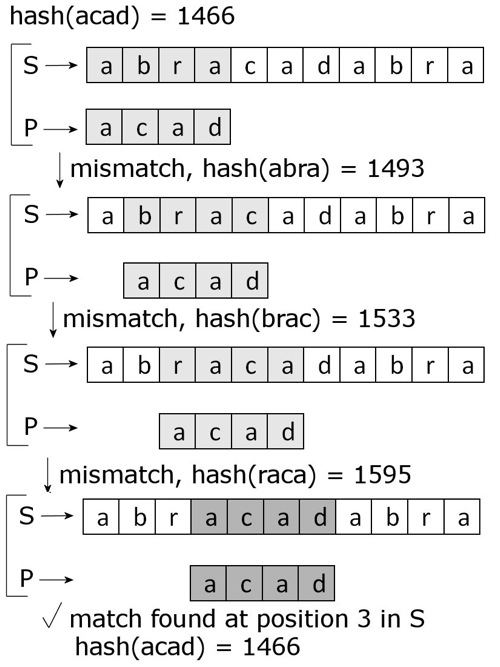

In [3]:
d = 10 # no of characters

def rabin_karp_search(pattern, text, q): # q - prime number
    
    m = len(pattern)
    n = len(text)
    p = 0 #hash value for pattern
    t = 0 #hash value for text
    h = 1
    i = 0
    j = 0

    for i in range(m-1):
        h = (h*d) % q

    # Calculate hash value for pattern and text

    for i in range(m):
        p = (d*p + ord(pattern[i])) % q
        t = (d*t + ord(text[i])) % q

    # Find the match
    
    for i in range(n-m+1):
        if p == t:
            for j in range(m):
                if text[i+j] != pattern[j]:
                    break

            j += 1
            if j == m:
                print("Pattern is found at position: " + str(i+1))
        if i < n-m:
            t = (d*(t-ord(text[i])*h) + ord(text[i+m])) % q

            if t < 0:
                t = t+q

In [4]:
text = 'This is an example string that is written for test purposes'
pattern = 'written'
pattern_2 = 'is'
q = 13
rabin_karp_search(pattern, text, q)
rabin_karp_search(pattern_2, text, q)

Pattern is found at position: 35
Pattern is found at position: 3
Pattern is found at position: 6
Pattern is found at position: 32


___________________________________________________________________________________________________________________

## The Knuth-Morris-Pratt algorithm

The KMP algorithm is a pattern matching algorithm based on the idea that the overlapping text in the pattern itself can be used to immediately know at the time of any mismatch how much the pattern should be shifted to skip unnecessary comparisons. In this algorithm, we will precompute the prefix function that indicates the required number of shifts of the pattern whenever we get a mismatch. The KMP algorithm preprocesses the pattern to avoid unnecessary comparisons using the prefix function. So, the algorithm utilizes the prefix function to estimate how much the pattern should be shifted to search the pattern in the text string whenever we get a mismatch. The KMP algorithm is efficient as it minimizes the number of comparisons of the given patterns with respect to the text string.

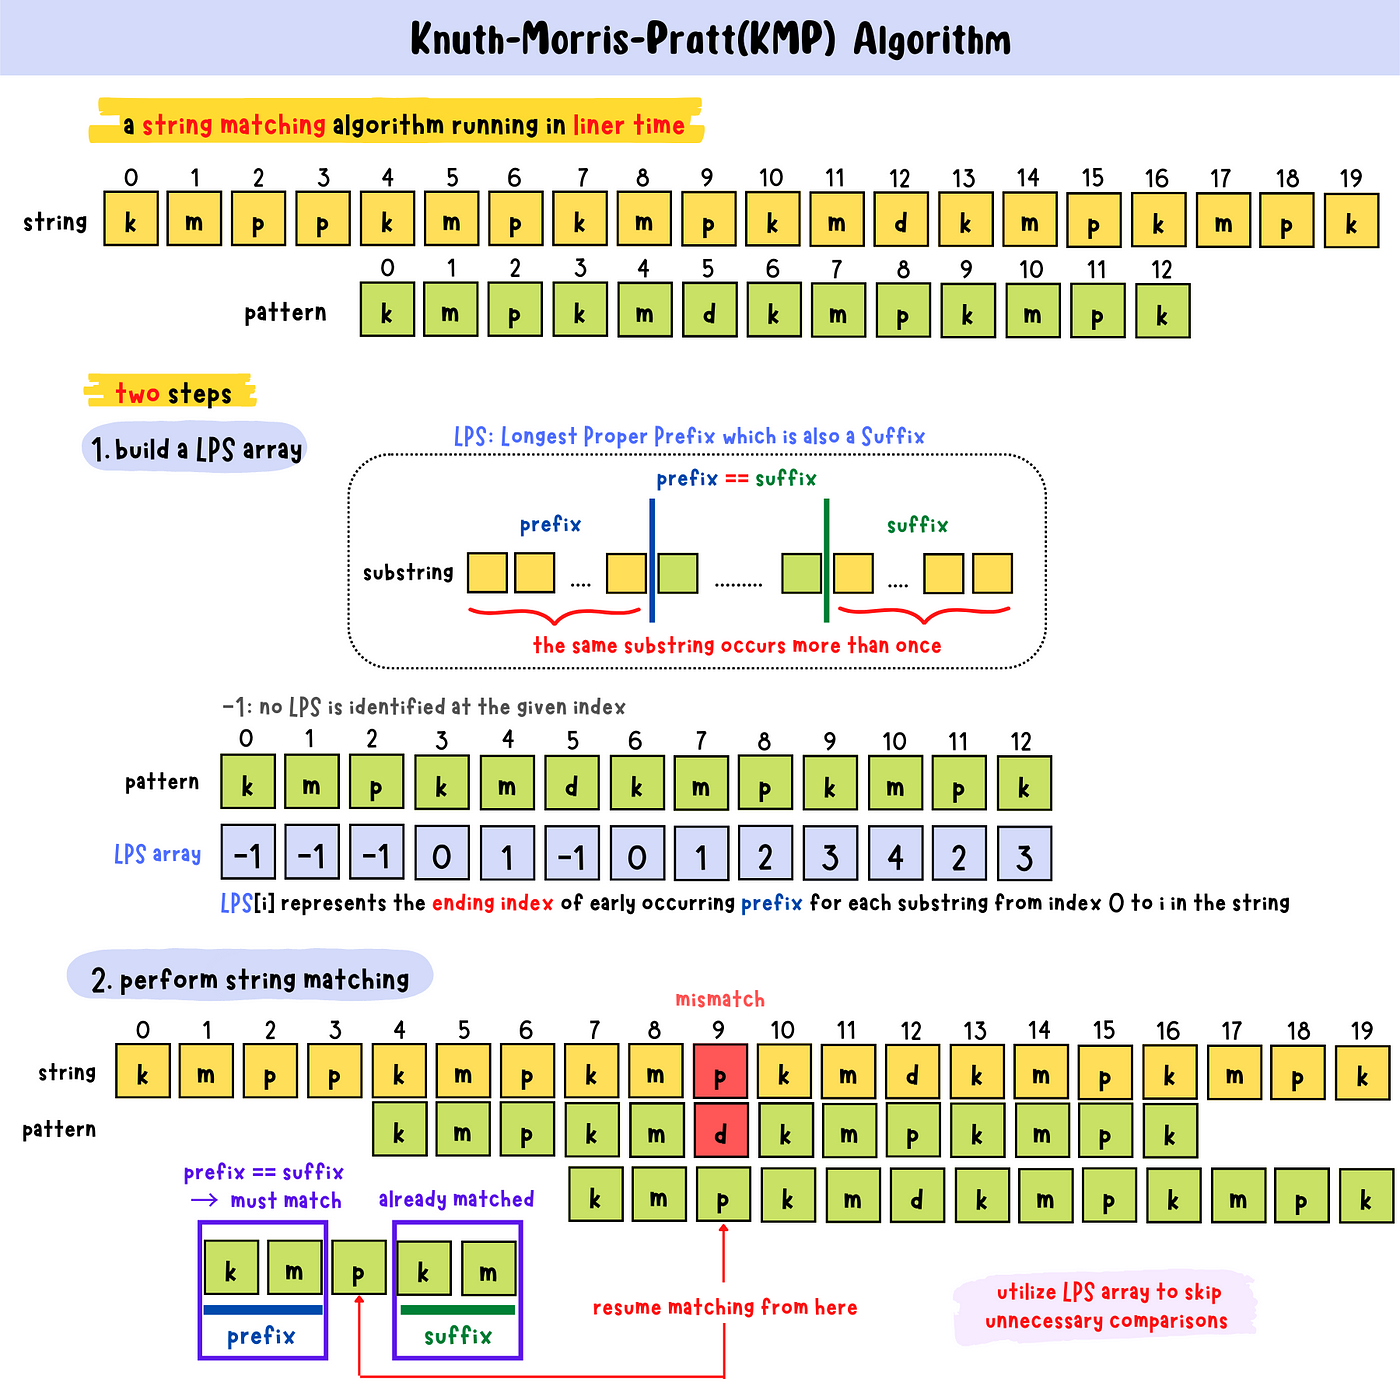

In [5]:
def build_prefix_table(pattern):
    m = len(pattern)
    prefix_table = [0] * m
    length = 0  # Length of the current prefix (also the index to fill)
    
    for i in range(1, m):
        while length > 0 and pattern[i] != pattern[length]:
            length = prefix_table[length - 1]
        if pattern[i] == pattern[length]:
            length += 1
        prefix_table[i] = length
    
    return prefix_table

def kmp_search(text, pattern):
    n = len(text)
    m = len(pattern)
    prefix_table = build_prefix_table(pattern)
    j = 0  # Index for the pattern
    
    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = prefix_table[j - 1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            return i - m + 1  # Pattern found starting at index i - m + 1
    
    return -1  # Pattern not found

# Example usage
text = "connect the dots is a fun game for a group of friends"
pattern = "fun game"
result = kmp_search(text, pattern)

if result != -1:
    print(f"Pattern found at index {result}")
else:
    print("Pattern not found")

Pattern found at index 22


___________________________________________________________________________________________________________________

## The Boyer-Moore algorithm

As we have already discussed, the main objective of the string pattern matching algorithm is to find ways of skipping comparisons as much as possible by avoiding unnecessary comparisons. The Boyer-Moore pattern matching algorithm is another such algorithm (along with the KMP algorithm) that further improves the performance of pattern matching by skipping comparisons using different methods.

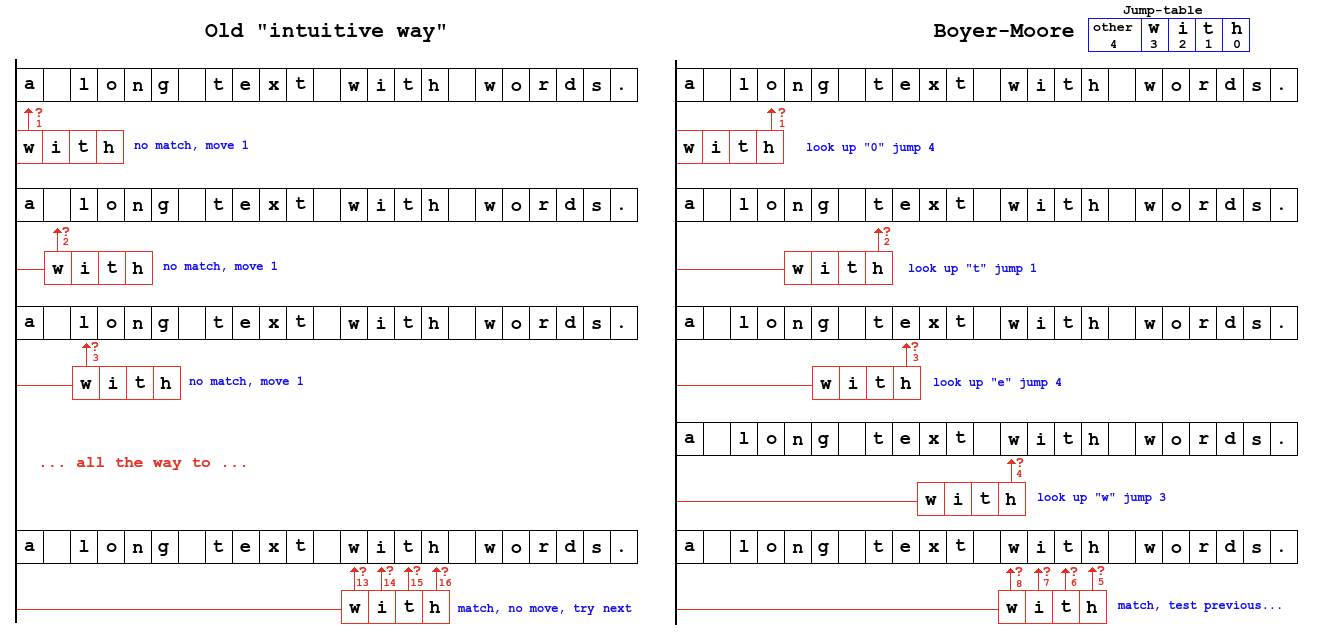

In [6]:
def build_bad_character_table(pattern):
    table = {}  # A dictionary to store the rightmost occurrence of each character
    for i in range(len(pattern)):
        table[pattern[i]] = i
    return table

def boyer_moore_search(text, pattern):
    n = len(text)
    m = len(pattern)
    bad_character_table = build_bad_character_table(pattern)
    i = 0  # Index for the text
    
    while i <= n - m:
        j = m - 1  # Index for the pattern
        
        while j >= 0 and pattern[j] == text[i + j]:
            j -= 1
        
        if j == -1:  # Pattern found
            return i
        
        bad_character_offset = j - bad_character_table.get(text[i + j], -1)
        i += max(1, bad_character_offset)
    
    return -1  # Pattern not found

# Example usage
text = "cannot be contained!! in order to be , you have to be , be , be"
pattern = "be"
result = boyer_moore_search(text, pattern)

if result != -1:
    print(f"Pattern found at index {result}")
else:
    print("Pattern not found")

Pattern found at index 7


___________________________________________________________________________________________________________________

## Dijkstra's Algorithm

Dijkstra's algorithm is used to find the shortest paths from a single source vertex to all other vertices in a weighted graph. It works for both directed and undirected graphs, but it requires that all edge weights be non-negative.

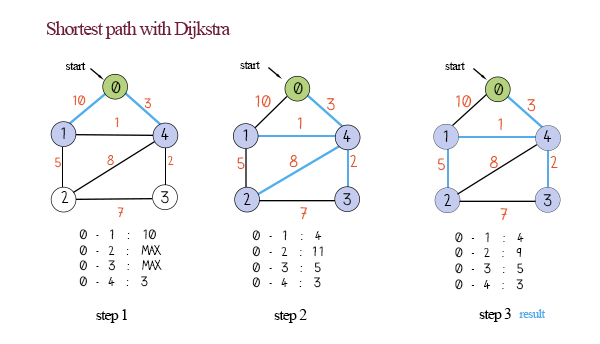

In [7]:
import heapq

def dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        # Skip if we've already found a better path to the current vertex
        if current_distance > distances[current_vertex]:
            continue
        
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances

# Example graph represented as an adjacency list
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

start_vertex = 'A'
shortest_distances = dijkstra(graph, start_vertex)

print("Shortest distances from vertex", start_vertex)
for vertex, distance in shortest_distances.items():
    print(f"To vertex {vertex}: {distance}")

Shortest distances from vertex A
To vertex A: 0
To vertex B: 1
To vertex C: 3
To vertex D: 4


___________________________________________________________________________________________________________________

## Kruskal's Algorithm

Kruskal's algorithm is used to find the minimum spanning tree (MST) of a connected, undirected graph with weighted edges. The MST is a subset of the graph's edges that connects all the vertices together without forming any cycles and has the minimum possible total edge weight.

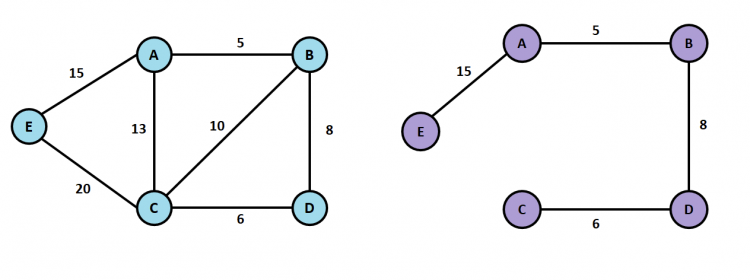

In [8]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Search function
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    def kruskal_algo(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        for u, v, weight in result:
            print("%d - %d: %d" % (u, v, weight))

In [9]:
g = Graph(6)
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 4)
g.add_edge(1, 2, 2)
g.add_edge(1, 0, 4)
g.add_edge(2, 0, 4)
g.add_edge(2, 1, 2)
g.add_edge(2, 3, 3)
g.add_edge(2, 5, 2)
g.add_edge(2, 4, 4)
g.add_edge(3, 2, 3)
g.add_edge(3, 4, 3)
g.add_edge(4, 2, 4)
g.add_edge(4, 3, 3)
g.add_edge(5, 2, 2)
g.add_edge(5, 4, 3)
g.kruskal_algo()

1 - 2: 2
2 - 5: 2
2 - 3: 3
3 - 4: 3
0 - 1: 4
